## 🍱 Food Rating Prediction From Reviews

Given *Amazon food reviews*, let's try to predict the **rating** associated with a given review.

We will use a Tensorflow ANN to make our predictions. 

Data source: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

import tensorflow as tf

from sklearn.metrics import confusion_matrix

import warnings
warnings.simplefilter('ignore')

2025-04-17 12:00:01.631290: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('Reviews.csv', nrows=1000)
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [3]:
reviews = data['Text'].copy()
ratings = data['Score'].copy()

### Creating Labels

In [4]:
print("Class Distribution: ")
print(ratings.value_counts() / len(ratings))

Class Distribution: 
Score
5    0.642
4    0.138
1    0.098
3    0.075
2    0.047
Name: count, dtype: float64


In [5]:
labels = ratings.apply(lambda x: 1 if x == 5 else 0)

In [6]:
print("Label Distribution: ")
print(labels.value_counts() / len(ratings))

Label Distribution: 
Score
1    0.642
0    0.358
Name: count, dtype: float64


In [7]:
labels.unique()

array([1, 0])

### Preprocessing

In [8]:
reviews

0      I have bought several of the Vitality canned d...
1      Product arrived labeled as Jumbo Salted Peanut...
2      This is a confection that has been around a fe...
3      If you are looking for the secret ingredient i...
4      Great taffy at a great price.  There was a wid...
                             ...                        
995    BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996    Man what can i say, this salsa is the bomb!! i...
997    this sauce is so good with just about anything...
998    Not hot at all. Like the other low star review...
999    I have to admit, I was a sucker for the large ...
Name: Text, Length: 1000, dtype: object

In [9]:
stop_words = stopwords.words('english')
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [10]:
def process_text(text):
    # Let's remove digits and stop words
    text = re.sub(r'\d+', ' ', text)
    text = text.split()
    text = " ".join([word for word in text if word.lower().strip() not in stop_words])
    return text

In [11]:
reviews = reviews.apply(process_text)

In [12]:
reviews

0      bought several Vitality canned dog food produc...
1      Product arrived labeled Jumbo Salted Peanuts.....
2      confection around centuries. light, pillowy ci...
3      looking secret ingredient Robitussin believe f...
4      Great taffy great price. wide assortment yummy...
                             ...                        
995    BLACK MARKET HOT SAUCE WONDERFUL.... husband L...
996    Man say, salsa bomb!! different kinds. almost ...
997    sauce good anything, like adding asian food an...
998    hot all. Like low star reviewer, got suckered ...
999    admit, sucker large quantity, oz, shopping hot...
Name: Text, Length: 1000, dtype: object

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)

In [14]:
tokenizer.word_index

{'br': 1,
 'chips': 2,
 'like': 3,
 'good': 4,
 'taste': 5,
 'great': 6,
 'flavor': 7,
 'one': 8,
 'product': 9,
 'it': 10,
 'food': 11,
 'love': 12,
 'bag': 13,
 'tea': 14,
 'kettle': 15,
 'best': 16,
 'amazon': 17,
 'really': 18,
 'would': 19,
 'get': 20,
 'much': 21,
 'also': 22,
 'buy': 23,
 'time': 24,
 'use': 25,
 'sugar': 26,
 'price': 27,
 'coffee': 28,
 'brand': 29,
 'bags': 30,
 'find': 31,
 'better': 32,
 'them': 33,
 'potato': 34,
 'salt': 35,
 'eat': 36,
 'try': 37,
 'well': 38,
 'i': 39,
 'tried': 40,
 'little': 41,
 'used': 42,
 'make': 43,
 'even': 44,
 'chip': 45,
 'flavors': 46,
 'found': 47,
 'organic': 48,
 'chocolate': 49,
 'sweet': 50,
 'first': 51,
 'favorite': 52,
 'spicy': 53,
 'bought': 54,
 'a': 55,
 'know': 56,
 'box': 57,
 'many': 58,
 'ever': 59,
 'hot': 60,
 'quality': 61,
 'order': 62,
 'store': 63,
 'could': 64,
 'recommend': 65,
 'still': 66,
 'water': 67,
 'since': 68,
 'think': 69,
 'delicious': 70,
 'this': 71,
 'made': 72,
 'bit': 73,
 'ingredients

In [15]:
vocab_length = len(tokenizer.word_index) + 1
vocab_length

5897

In [16]:
sequences = tokenizer.texts_to_sequences(reviews)

max_seq_length = np.max(list(map(lambda x: len(x), sequences)))

sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

In [17]:
max_seq_length

576

In [18]:
sequences

array([[  54,  268, 3102, ...,    0,    0,    0],
       [   9,  234, 2182, ...,    0,    0,    0],
       [3107,  183, 3108, ...,    0,    0,    0],
       ...,
       [ 108,    4,  220, ...,    0,    0,    0],
       [  60,  117,    3, ...,    0,    0,    0],
       [1180, 5889,  240, ...,    0,    0,    0]], dtype=int32)

### Splitting

In [19]:
train_sequences, test_sequences, train_labels, test_labels = train_test_split(sequences, labels, train_size=0.7, random_state=1001)

### Modeling

In [20]:
sequences.shape

(1000, 576)

In [21]:
class_weight = dict(
    enumerate(
        class_weight.compute_class_weight(
            class_weight='balanced',
            classes=labels.unique(),
            y=labels
        )
    )
)

class_weight

{0: 0.778816199376947, 1: 1.3966480446927374}

2025-04-17 12:00:03.828185: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2025-04-17 12:00:04.154853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-04-17 12:00:04.157742: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-04-17 12:00:04.1

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 576)]             0         
                                                                 
 embedding (Embedding)       (None, 576, 64)           377408    
                                                                 
 bidirectional (Bidirectiona  (None, 576, 512)         494592    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 294912)            0         
                                                                 
 dense (Dense)               (None, 1)                 294913    
                                                                 
Total params: 1,166,913
Trainable params: 1,166,913
Non-trainable params: 0
___________________________________________________

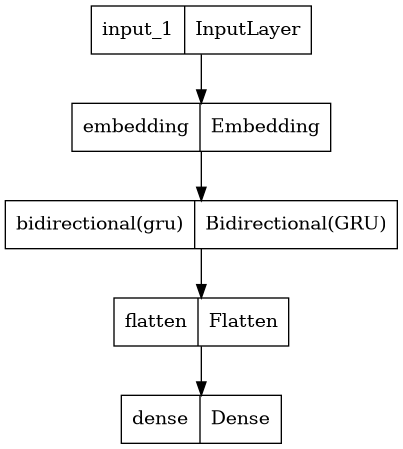

In [22]:
embedding_dim = 64

inputs = tf.keras.Input(shape=(max_seq_length, ))

embedding = tf.keras.layers.Embedding(
    input_dim = vocab_length,
    output_dim = embedding_dim,
    input_length=max_seq_length
)(inputs)

gru_layer = tf.keras.layers.Bidirectional(
    tf.keras.layers.GRU(256, return_sequences=True))(embedding)

flatten = tf.keras.layers.Flatten()(gru_layer)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten)

model = tf.keras.Model(inputs, outputs)

print(model.summary())

tf.keras.utils.plot_model(model)

### Training

In [23]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

In [24]:
history = model.fit(
    train_sequences,
    train_labels,
    validation_split=0.2,
    class_weight=class_weight,
    batch_size=32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10


2025-04-17 12:00:04.941240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-04-17 12:00:04.944041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-04-17 12:00:04.946242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

18/18 [==============================] - ETA: 0s - loss: 0.6696 - accuracy: 0.6625 - auc: 0.5343  

2025-04-17 12:00:50.801938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-04-17 12:00:50.803724: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-04-17 12:00:50.805581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

18/18 [==============================] - 49s 2s/step - loss: 0.6696 - accuracy: 0.6625 - auc: 0.5343 - val_loss: 0.6679 - val_accuracy: 0.6786 - val_auc: 0.5151
Epoch 2/10
18/18 [==============================] - 42s 2s/step - loss: 0.6044 - accuracy: 0.6607 - auc: 0.6724 - val_loss: 0.6383 - val_accuracy: 0.6786 - val_auc: 0.5739
Epoch 3/10
18/18 [==============================] - 43s 2s/step - loss: 0.4952 - accuracy: 0.6893 - auc: 0.9051 - val_loss: 0.6396 - val_accuracy: 0.6857 - val_auc: 0.7153
Epoch 4/10
18/18 [==============================] - 44s 2s/step - loss: 0.2050 - accuracy: 0.9232 - auc: 0.9826 - val_loss: 0.6094 - val_accuracy: 0.7071 - val_auc: 0.7205
Epoch 5/10
18/18 [==============================] - 62s 3s/step - loss: 0.0426 - accuracy: 0.9893 - auc: 0.9998 - val_loss: 0.9561 - val_accuracy: 0.6857 - val_auc: 0.6894
Epoch 6/10
18/18 [==============================] - 59s 3s/step - loss: 0.0246 - accuracy: 0.9929 - auc: 0.9997 - val_loss: 0.7391 - val_accuracy: 0.65

### Results

In [26]:
model.evaluate(test_sequences, test_labels)

10/10 [==============================] - 9s 927ms/step - loss: 0.7069 - accuracy: 0.6533 - auc: 0.7142


[0.7069017291069031, 0.653333306312561, 0.7141610383987427]

In [27]:
y_true = np.array(test_labels, dtype=int)
y_pred = np.squeeze(np.array(model.predict(test_sequences) >= 0.5, dtype=int))

2025-04-17 12:09:23.672561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-04-17 12:09:23.674054: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-04-17 12:09:23.678173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 8s 762ms/step


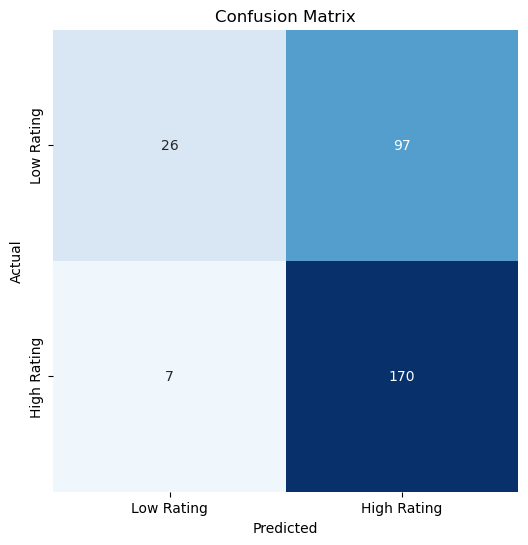

In [28]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, vmin=0,fmt='g', cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.xticks(np.arange(2) + 0.5, ['Low Rating', 'High Rating'])

plt.ylabel('Actual')
plt.yticks(np.arange(2) + 0.5, ['Low Rating', 'High Rating'])

plt.title("Confusion Matrix")

plt.show()